<a href="https://colab.research.google.com/github/OmkarPatkar/machine-learning/blob/main/DecisionTreesPruning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Post pruning decision trees with cost complexity pruning**

* The :class:DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting.
* Cost complexity pruning provides another option to control the size of a tree. 
* In :class:DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. 
* Greater values of ccp_alpha increase the number of nodes pruned.
* Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

**Source:**
https://github.com/krishnaik06/Post_Pruning_DecisionTre/blob/master/plot_cost_complexity_pruning.ipynb

In [50]:
# Load Libraries

print(__doc__)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

Automatically created module for IPython interactive environment


In [51]:
# Load the data 
x, y = load_breast_cancer(return_X_y = True)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

# Build the model and fit the data
clf = DecisionTreeClassifier(random_state = 0)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [52]:
# Predict on test data 
pred = clf.predict(x_test)

# Check the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8811188811188811

[Text(468.32142857142856, 513.4, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(298.9285714285714, 453.0, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(199.28571428571428, 392.6, 'X[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(119.57142857142856, 332.2, 'X[25] <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(79.71428571428571, 271.8, 'X[21] <= 30.145\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(39.857142857142854, 211.39999999999998, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(119.57142857142856, 211.39999999999998, 'X[14] <= 0.004\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(79.71428571428571, 151.0, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(159.42857142857142, 151.0, 'X[1] <= 23.2\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(119.57142857142856, 90.59999999999997, 'X[1] <= 22.385\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(79.71428571428571

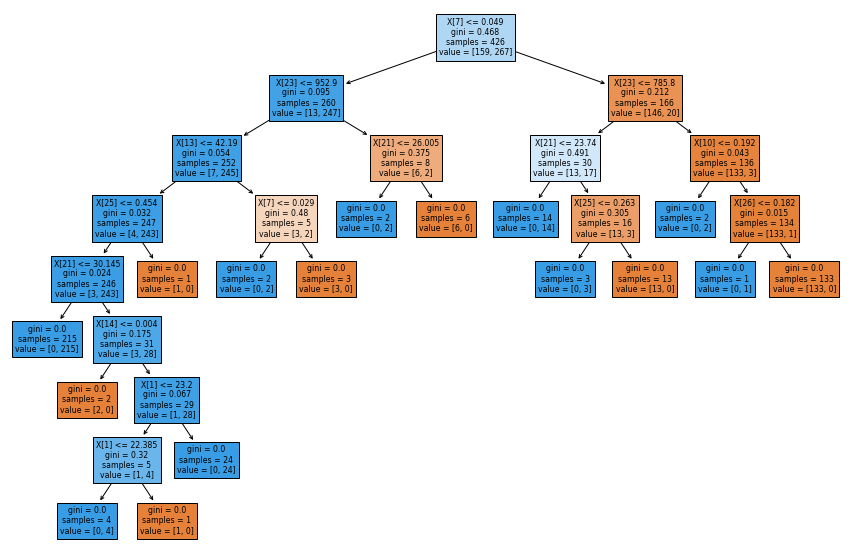

In [53]:
# Plot the tree
from sklearn import tree

plt.figure(figsize = (15, 10))
tree.plot_tree(clf, filled = True)

* Here we have a decision tree with its complete max depth, we will try to prun the tree to get some better results 

In [54]:
# ccp_alphas is used to set the depth of the decision trees, 
# ccp_alphas provides a list of weak points wrt various nodes 

path = clf.cost_complexity_pruning_path(x_train, y_train )
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [55]:
# Loop through all the ccp_alphas values then build and fit the model and store it in an array  
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
  clf.fit(x_train, y_train)
  clfs.append(clf)

print(f'Number of nodes in the last tree is: {clfs[-1].tree_.node_count, ccp_alphas[-1]}')

Number of nodes in the last tree is: (1, 0.3272984419327777)


* We remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node.
* Here we show that the number of nodes and tree depth decreases as alpha increases.

# Accuracy vs alpha for training and testing sets
* When ccp_alpha is set to zero and keeping the other default parameters of :class:DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy.
* As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better.
* In this example, setting ccp_alpha = 0.012 maximizes the testing accuracy.

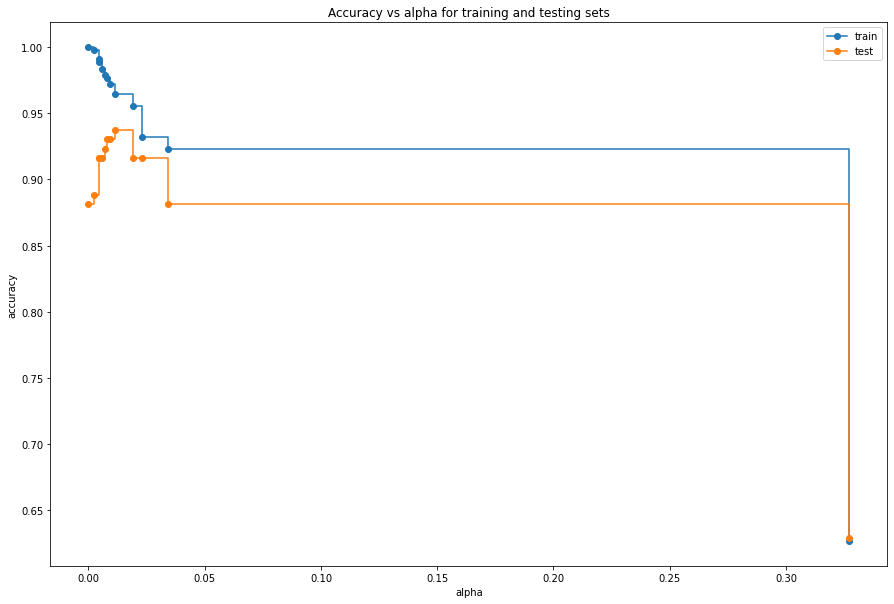

In [56]:
# Check the train and test score
train_score = [clf.score(x_train, y_train) for clf in clfs]
test_score = [clf.score(x_test, y_test) for clf in clfs]

# Plot the accuracy graph
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_score, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_score, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [57]:
# Build the model with new ccp_alpha value
clf = DecisionTreeClassifier(random_state = 0, ccp_alpha = 0.012)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.012, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [58]:
# Predict the results and check the accuracy
pred = clf.predict(x_test)
accuracy_score(y_test, pred)

0.9370629370629371

[Text(167.4, 190.26, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(83.7, 135.9, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(41.85, 81.53999999999999, 'gini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(125.55000000000001, 81.53999999999999, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(251.10000000000002, 135.9, 'X[23] <= 785.8\ngini = 0.212\nsamples = 166\nvalue = [146, 20]'),
 Text(209.25, 81.53999999999999, 'X[21] <= 23.74\ngini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(167.4, 27.180000000000007, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(251.10000000000002, 27.180000000000007, 'gini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(292.95, 81.53999999999999, 'gini = 0.043\nsamples = 136\nvalue = [133, 3]')]

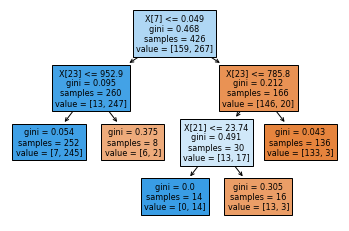

In [59]:
# Plot the tree
tree.plot_tree(clf, filled = True)